
#**PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS**
##**PÓS-GRADUAÇÃO LATO SENSU EM CIÊNCIA DE DADOS E BIG DATA**
###***TCC - TRABALHO DE CONCLUSÃO DE CURSO:***
###***APLICAÇÃO DE MODELOS ESTATÍSTICOS E DE APRENDIZADO DE MÁQUINA PARA A ESTIMATIVA DO PREÇO DA GASOLINA EM FUNÇÃO DE VARIÁVEIS ECONÔMICAS***
# Discente: Henrique Viegas Cunha
<hr>

#***PROJETO FUEL_PRICE: modelagem de dados ARIMA e VAR***
# **Capítulo 5**
<hr>

### O presente *notebook* visa à criação de modelos de aprendizagem de máquina para a previsão do preço da gasolina em função de diversas variáveis econômicas
### O dados foram obtidos e tratados inicialmente por meio do notebook *extracao_e_tratamento_inicial.ipynb*
### A análise exploratória inicial foi realizada através do notebook *explora_dados.ipynb*
<hr> 

#*Montando* o Drive e importando bibliotecas iniciais:
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

### Instalando as bibliotecas necessárias para modelar o ARIMA e VAR
<hr>

In [ ]:
# Instalando stasmodels
#Última versão dispoível em 08/09/2022
!pip install statsmodels==0.13.2 

# Para funções estatísticas 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

# Importando o teste de Causalidade de Granger:
from statsmodels.tsa.stattools import grangercausalitytests

# Importando a estatística de Durbin-Watson:
from statsmodels.stats.stattools import durbin_watson

# Importando o teste de Ljung-Box:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Retirando warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Ignorando os avisos de erro na convergência
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Importando as bibliotecas de modelagem
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR

# Instalando pmdarima
!pip install pmdarima
#from pmdarima import auto_arima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importação de bibliotecas diversas para manipulação de dados
<hr>

In [ ]:
# Bibliotecas
# Para manipulação de dados
import numpy as np
import pandas as pd
import math
import string
import os

# Atualizando para a leitura de planilha Excel
!pip install xlrd
!pip install --upgrade xlrd

# Para plotagem dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Para manipulação de datas
from datetime import datetime
import time

# Selecionando o tema para os gráficos
sns.set_theme(style='ticks')

# Biblioteca de datas: datas relativas
from dateutil.relativedelta import relativedelta


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Definindo parâmetros de apresentação dos dados:
pd.set_option('display.max_columns', 30) #None) 
pd.set_option('display.max_rows', 30) #None) 
pd.set_option('display.max_colwidth', 30) #None)
#Definindo parâmetros de apresentação dos dados:
#pd.reset_option('display.max_columns') #None) 
#pd.reset_option('display.max_rows') #None) 
#pd.reset_option('display.max_colwidth') #None)

###*Montando* o drive do *Google* para a leitura de arquivos no Google Drive e a exportação do dataframe de trabalho
<hr>

In [ ]:
# "MONTANDO" o drive do Google Drive
# Load the Drive helper and mount (carregando)
from google.colab import drive
# This will prompt for authorization (prompt de autorização)
drive.mount('/content/drive', force_remount=True)

# Definindo o caminho para salvamento dos gráficos gerados
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'

# Caminho onde se encontram os dataframes:
# path_backup_df = r'C:\Users\Henrique\Documents\TCC-PUCMG\DADOS\BACKUP_DF\' 
path_backup_df = r'/content/drive/MyDrive/NOVO_TCC/DADOS/BACKUP_DF/'

Mounted at /content/drive


# Obtendo os dados já trabalhados anteriormente
# Dataset de trabalho *df_trab* 
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

### O presente *notebook* visa à criação de modelos de aprendizagem de máquina para a previsão do preço da gasolina em função de diversas variáveis econômicas
### O dados foram obtidos e tratados inicialmente por meio do notebook *extracao_e_tratamento_inicial.ipynb*
### A análise exploratório inicial foi realizada através do notebook *explora_dados.ipynb*
<hr> 

### Cabe ressaltar que em nossa análise exploratória consideramos um dataframe adaptado com os valores médios mensais. Para os modelos de ML será utilizado o dataframe mais completo, com valores quase diários obtidos para as variáveis econômicas, considerando, claro, o ajuste dado por conta do tratamento dos dados

### Ainda, a coluna Fuel_Price_USD foi calculada por meio do preço da gasolina em reais (coluna Fuel_Price) e a cotação do dólar frente ao real (coluna USD/BRL). Entende-se que não é necessário manter a coluna Fuel_Price_USD para os modelos de ML, já que ela não traz nenhuma nova informação. Assim, tal coluna não será adicionada ao dataframe de trabalho
<hr> 

### O dataframe *df_final*, obtido na fase de extração e tratamento inicial,  está armazenado em formato *csv* e será importado e copiado para *df_trab*
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

In [ ]:
# Leitura do dataset de trabalho, df_final
arq_exportado = path_backup_df+'df_final.csv'
#arq_exportado = path_backup_df+df_final.csv'
df_trab = pd.read_csv(arq_exportado)

# Dimensões de df_trab:
print(f"\nDimensões de df_trab:\n {df_trab.shape} \n\ndf_trab.head():")

# Visualizando o dataset obtido
df_trab.head()


Dimensões de df_trab:
 (2176, 7) 

df_trab.head():


,Date,PETR4,USD/BRL,IPCA,MWh,Fuel_Price,Brent
0,2011-01-03,27.000000,1.6470,0.43,35873744,2.584085,94.84
1,2011-01-04,26.900000,1.6610,0.43,35873744,2.637004,93.53
2,2011-01-05,27.219999,1.6737,0.43,35873744,2.606665,95.50
3,2011-01-06,27.110001,1.6856,0.43,35873744,2.669766,94.52
4,2011-01-10,26.980000,1.6888,0.43,35873744,2.614946,95.70


In [ ]:
# Modificando coluna Date para tipo Datetime
df_trab['Date'] = pd.to_datetime(df_trab['Date'])

# Modificando coluna MWh para tipo float
df_trab['MWh'] = df_trab['MWh'].astype(float)

# Reindexando o dataset obtido
df_trab = df_trab.reindex(columns=['Date','Fuel_Price','USD/BRL','PETR4','Brent','IPCA','MWh'])
df_trab.head()

,Date,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh
0,2011-01-03,2.584085,1.6470,27.000000,94.84,0.43,35873744.0
1,2011-01-04,2.637004,1.6610,26.900000,93.53,0.43,35873744.0
2,2011-01-05,2.606665,1.6737,27.219999,95.50,0.43,35873744.0
3,2011-01-06,2.669766,1.6856,27.110001,94.52,0.43,35873744.0
4,2011-01-10,2.614946,1.6888,26.980000,95.70,0.43,35873744.0


### Criando novo dataframe de trabalho, *df_new*, cópia de *df_final*. Para uso ao longo do trabalho
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

In [ ]:
# Criando uma cópia do dataframe para uso geral:
df_new = df_trab.copy()
# Fixando a coluna Date como index da série temporal
df_new = df_new.set_index('Date')
df_new.head()

,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh
Date,,,,,,
2011-01-03,2.584085,1.6470,27.000000,94.84,0.43,35873744.0
2011-01-04,2.637004,1.6610,26.900000,93.53,0.43,35873744.0
2011-01-05,2.606665,1.6737,27.219999,95.50,0.43,35873744.0
2011-01-06,2.669766,1.6856,27.110001,94.52,0.43,35873744.0
2011-01-10,2.614946,1.6888,26.980000,95.70,0.43,35873744.0


In [ ]:
# Função para validação dos modelos gerados:
def validation (y_true, y_hat):
    #Calcula as seguintes métricas:
    #RMSE = Raiz do Erro Quadrático Médio
    #MAE = Erro Absoluto Médio
    #corr = Correlação de Pearson
        
    # Calculando as métricas de validação:
    rmse = np.sqrt(np.mean((y_hat - y_true)**2))
    mae = np.mean(np.abs(y_hat - y_true))
    corr = np.corrcoef(y_hat, y_true)[0,1]
    resultados = {'RMSE': rmse, 'MAE':mae, 'corr': corr}
    labels = {'RMSE': "Raiz do Erro Quadrático Médio",
              'MAE': "Erro Absoluto Médio",
              'corr': "Correlação de Pearson"}
 
    # Imprimindo os resultados:
    print ("Validação do modelo por métricas estatísticas:")
    for (k, v), (w, t) in zip(resultados.items(), labels.items()):
        print(f"{t} ({k}) = {round(v,4)} ")
    print('\n')
         
    return resultados

# **5. Modelos Estatísticos**

## **5.1. ARIMA**
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

ARIMA é um acrônimo que significa Modelo Autorregressivo Integrado de Médias Móveis. É um modelo que captura um conjunto de diferentes estruturas temporais padrão em dados de séries temporais. É uma generalização da Média Móvel Autorregressiva mais simples e adiciona a noção de integração.

Esta sigla é descritiva, capturando os principais aspectos do próprio modelo. Resumidamente, são eles:

- **AR**: Autorregressão. Um modelo que usa a relação dependente entre uma observação e um certo número de observações defasadas.
- **I**: Integração. O uso de diferenciação de observações brutas (por exemplo, subtraindo uma observação de uma observação na etapa de tempo anterior) para tornar a série temporal estacionária.
- **MA**: Média Móvel. Um modelo que usa a dependência entre uma observação e um erro residual de um modelo de média móvel aplicado a observações defasadas.

Cada um desses componentes é especificado explicitamente no modelo como um parâmetro. Uma notação padrão é usada de ARIMA(p,d,q) onde os parâmetros são substituídos por valores inteiros para indicar rapidamente o modelo ARIMA específico que está sendo usado.

Os parâmetros do modelo ARIMA são definidos da seguinte forma:

- **p**: O número de observações de defasagem incluídas no modelo, também chamado de ordem de defasagem.
- **d**: O número de vezes que as observações brutas são diferenciadas, também chamado de grau de diferenciação.
- **q**: O tamanho da janela de média móvel, também chamada de ordem da média móvel.

Um modelo autorregressivo (AR) toma como base a intuição de que o passado prediz o futuro. Desse modo, ele pressupõe um processo de série temporal na qual o valor em um ponto no tempo $t$ é uma função dos valores da sŕie em pontos anteriores no tempo.

Um modelo de média móvel (MA) se baseia em um processo em que o valor em cada ponto no tempo é uma função dos termos de "erro" do valor do passado recente, cada qual independente dos outros.

O modelo ARIMA combina os dois modelos (AR e MA) levando em consideração a diferenciação, uma forma de remover tendências e tornar uma série temporal estacionária. Ou seja, a diferenciação é a conversão de uma série temporal de valores em um série tempoal de mudança nos valores ao longo do tempo.

Este é um modelo univariado, como pode ter percebido, então vamos utilizá-lo apenas como benchmark para os outros modelos que vamos construir.
<hr>


### Inicialmente plota-se a série temporal completa para visualização inicial dos dados:

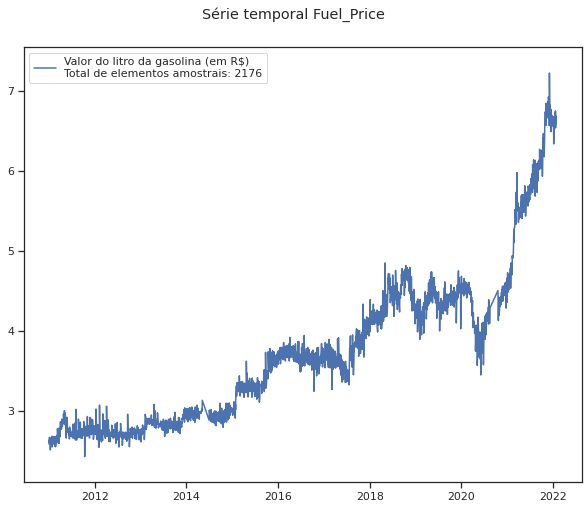

In [ ]:
## Plotando Fuel_Price (todos os valores)
plt.figure(figsize=(10,8))
plt.plot(df_new["Fuel_Price"], label=f"Valor do litro da gasolina (em R$)\nTotal de elementos amostrais: {(df_new.shape[0])}")
plt.legend()
plt.suptitle("Série temporal Fuel_Price", y=.95)
bottom, top = plt.ylim()  # Retorna os valores correntes de y no gráfico
left, right = plt.xlim()  # Retorna os valores correntes de x no gráfico
plt.ylim(bottom-0.08, top+0.08) # Redefine os limites de y no gráfico
plt.xlim(left-0.05, right+0.05) # Redefine os limites de x no gráfico
plt.show()

### Aparentemente não é uma série estacionária (como já havia sido visto para a série com as médias mensais de preços em reais da gasolina). Para verificar formalmente, aplica-se o teste de hipótese de Dickey-Fuller Aumentado (ADF). Onde as hipóteses são as seguintes:

###- **Hipótese nula (H0)**: não estacionária;
###- **Hipótese alternativa (H1)**: estacionária.

In [ ]:
# Teste de hipótese para a coluna Fuel_Price
result = adfuller(df_new.Fuel_Price.values)
print(f'p-value: coluna Fuel_Price = {result[1]}')

p-value: coluna Fuel_Price = 0.9947332288109054


### **P-value**: 0.9947, ou seja, não podemos rejeitar a hipótese nula.

### Ao menos uma diferenciação da série será necessário para buscar a estacionariedade

In [ ]:
# Calculando a diferença primeira de Fuel_Price:
diff_Fuel_Price = df_new["Fuel_Price"].diff()
#diff_Fuel_Price = df_new["Fuel_Price"].diff().fillna(method='bfill')
diff_Fuel_Price.head()

Date
2011-01-03         NaN
2011-01-04    0.052919
2011-01-05   -0.030339
2011-01-06    0.063101
2011-01-10   -0.054820
Name: Fuel_Price, dtype: float64

### Vamos verificar visualmente como está o gráfico da primeira diferença de Fuel_Price:

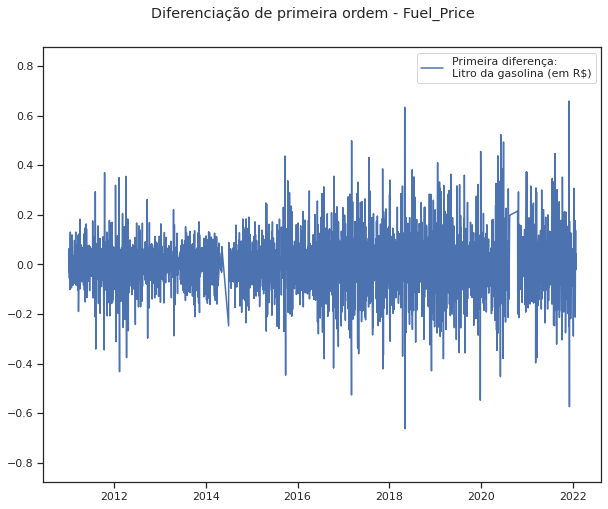

In [ ]:
## Plotando a primeira diferença de Fuel_Price
plt.figure(figsize=(10,8))
plt.suptitle('Diferenciação de primeira ordem - Fuel_Price', y=.95)
plt.plot(diff_Fuel_Price[1:], label="Primeira diferença:\nLitro da gasolina (em R$)")
plt.legend()

bottom, top = plt.ylim()  # Retorna os valores correntes de y no gráfico
left, right = plt.xlim()  # Retorna os valores correntes de x no gráfico
plt.ylim(bottom-0.15, top+0.15) # Redefine os limites de y no gráfico
plt.xlim(left-0.05, right+0.05) # Redefine os limites de x no gráfico

plt.show()

### O gráfico da primeira diferença de Fuel_Price se parece mais com o gráfico de uma série estacionária do que o gráfico original (da série não transformada. Deve-se aplicar o teste ADF para a primeira diferença e avaliar se esta nova série é estacionária

In [ ]:
# Aplicanto o teste ADF 
result01 = adfuller(diff_Fuel_Price[1:].values)
print(f'p-value: primeira diferença coluna Fuel_Price = {result01[1]}')

p-value: primeira diferença coluna Fuel_Price = 1.451810415878325e-14


###**P-value**: 1,4518 x 10e-14, ou seja, podemos rejeitar a hipótese nula

###(a série tornou-se estacionária com uma diferenciação)

###Assim, pode-se definir o parâmetro ***d*** do modelo ARIMA como sendo **d = 1**

### Para definir o parâmetro ***p*** do modelo ARIMA, seguimos Nielsen (página 172) e plotamos a **Função de Autocorrelação Parcial (PACF)** da série diferenciada *diff_Fuel_Price* (para um lag de 15 dias / períodos). Abaixo:

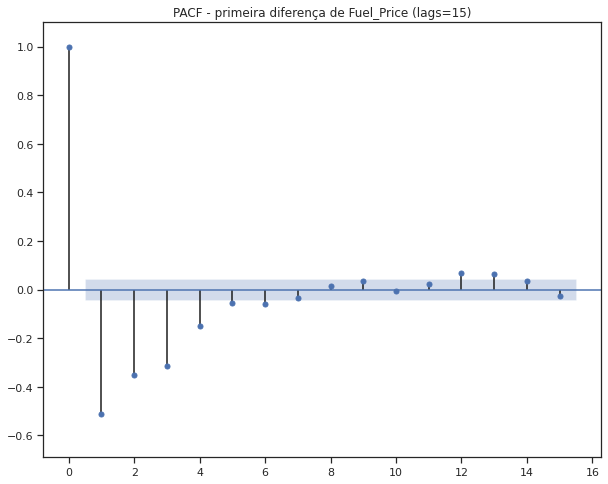

In [ ]:
# Plotando a função de autocorrelação parcial (PACF) para a diferenciação de Fuel_Price:
maxlag = 15 # Máximo de defasagem (lags)
fig, ax = plt.subplots(figsize=(10, 8))
plot_pacf(diff_Fuel_Price[1:].values, lags=maxlag,
          title=f"PACF - primeira diferença de Fuel_Price (lags={maxlag})",
          auto_ylims=True, ax = ax)
bottom, top = plt.ylim()  # Retorna os valores correntes de y no gráfico
plt.ylim(bottom-0.05, top-0.15) # Redefine os limites de y no gráfico
plt.show()


###Analisando o gráfico plotado acima, temos componentes com forte autocorrelação até o lag 4. Assim, adota-se inicialmente o lag de número 4 como a ordem do componente de autorregressão de nosso modelo ARIMA (p = 4)
<hr>

###Para verificar a ordem do componente MA (parâmetro ***q***) do modelo, plota-se o gráfico da **Função de Autocorrelação (ACF)** de *diff_Fuel_Price*. Novamente limita-se a defasagem a 15 dias/períodos (lags=15). A seguir:
<hr>

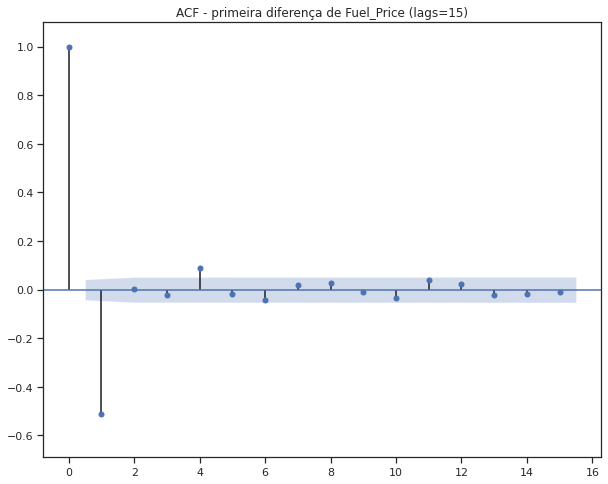

In [ ]:
# Plotando a função de autocorrelação (ACF) para a diferenciação de Fuel_Price:
fig, ax = plt.subplots(figsize=(10, 8))
plot_acf(diff_Fuel_Price[1:].values, lags=maxlag,
         title=f"ACF - primeira diferença de Fuel_Price (lags={maxlag})",
         auto_ylims=True, missing='drop', ax=ax)
bottom, top = plt.ylim()  # Retorna os valores correntes de y no gráfico
plt.ylim(bottom-0.05, top-0.15) # Redefine os limites de y no gráfico
plt.show()

### Como visto acima, o componente MA pode ser dfinido como **q = 1** no modelo ARIMA. Embora o lag de número 4 esteja um pouco acima do limite de significância, comparativamente, o mesmo pode ser desconsiderado
<hr>

### Antes de iniciar o treinamento, cria-se uma função de validação para calcular algumas métricas de avaliação do modelo, função *validation* a seguir
<hr>


### O treinamento do modelo ARIMA será feito por meio da classe ARIMA de *statsmodels*
<hr>

In [ ]:
# Separando os dados de treino e teste:
X = df_new.Fuel_Price.values 
train_size = round(len(X) * 0.75)
train_arima, test_arima = X[0:train_size], X[train_size:len(X)]
history= train_arima.tolist()
predictions = list()

In [ ]:
# Treinamento para modelo ARIMA(p,d,q)
# Parâmetros do modelo (inicialização):
p = 4
d = 1
q = 1

start_time = time.time() #Start do tempo para avaliar a demanda computacional
for t in range(len(test_arima)): #Passando pelos os valores de teste, dia a dia
    #Definição do modelo utilizando a base de dados atualizada "history":
    model = ARIMA(history, order=(p,d,q))#, enforce_invertibility=False) 
    model_fit_411 = model.fit()
    output = model_fit_411.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
final_time = time.time() #Tempo final para avaliar a demanda computacional

### Para validar o modelo, cria-se a função *validation* para calcular as seguintes métricas:

- **RMSE**: Raiz do Erro Quadrático Médio
- **MAE**: Erro Absoluto Médio
- **corr**: Correlação de Pearson

<hr WIDTH=30% ALIGN=LEFT NOSHADE>

In [ ]:
# Função para validação dos modelos gerados:
def validation (y_true, y_hat):
    #Calcula as seguintes métricas:
    #RMSE = Raiz do Erro Quadrático Médio
    #MAE = Erro Absoluto Médio
    #corr = Correlação de Pearson
        
    # Calculando as métricas de validação:
    rmse = np.sqrt(np.mean((y_hat - y_true)**2))
    mae = np.mean(np.abs(y_hat - y_true))
    corr = np.corrcoef(y_hat, y_true)[0,1]
    resultados = {'RMSE': rmse, 'MAE':mae, 'corr': corr}
    labels = {'RMSE': "Raiz do Erro Quadrático Médio",
              'MAE': "Erro Absoluto Médio",
              'corr': "Correlação de Pearson"}
 
    # Imprimindo os resultados:
    print ("Validação do modelo por métricas estatísticas:")
    for (k, v), (w, t) in zip(resultados.items(), labels.items()):
        print(f"{t} ({k}) = {round(v,4)} ")
    print('\n')
         
    return resultados

In [ ]:
# Validação do modelo
resultados_arima = validation(test_arima, predictions)

Validação do modelo por métricas estatísticas:
Raiz do Erro Quadrático Médio (RMSE) = 0.1222 
Erro Absoluto Médio (MAE) = 0.0912 
Correlação de Pearson (corr) = 0.9906 




### Abaixo, plotando os resultados obtidos para o modelo ARIMA:
<hr>

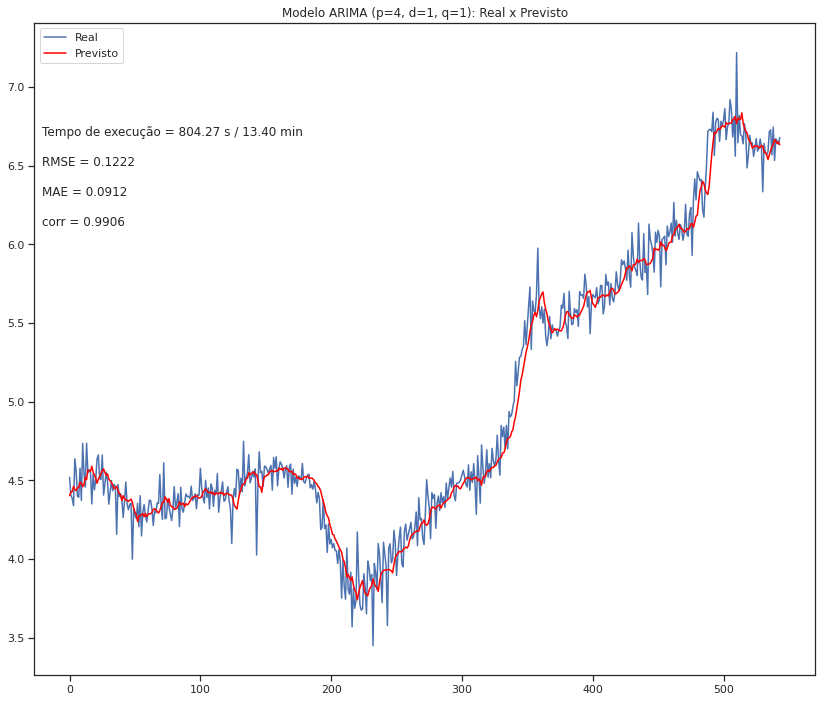

In [ ]:
# Plot previsto x esperado
plt.figure(figsize=(14, 12))
plt.plot(test_arima, label='Real')
plt.plot(predictions, color='red', label='Previsto')
plt.title(f"Modelo ARIMA (p={p}, d={d}, q={q}): Real x Previsto")
plt.legend()
texto = (f"Tempo de execução = {(final_time - start_time):.2f} s / {(final_time - start_time)/60:.2f} min")
left, right = plt.xlim() # Retorna os valores correntes de x no gráfico
bottom, top = plt.ylim() # Retorna os valores correntes de y no gráfico

y=top-0.72
x=left+6.15
plt.text(x, y, texto)
y-=.19
for k, v in resultados_arima.items():
  texto = (f"{k} = {round(v,4)}")
  plt.text(x, y, texto)
  y-=.19

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+'ARIMA_'+str(p)+str(d)+str(q), format='jpg')

plt.show()

### **Salvando os resultados para comparação entre os modelos:**
<hr>

In [ ]:
# Criando dataframe para salvar os resultados
index_all_metrics = 0
df_all_metrics = pd.DataFrame(columns = ['MODELO',
                                         'RMSE',
                                         'MAE',
                                         'corr',
                                         'Tempo_Processamento'])
df_all_metrics.loc[index_all_metrics] = [f'ARIMA_1',
                                         resultados_arima['RMSE'],
                                         resultados_arima['MAE'],
                                         resultados_arima['corr'],
                                         round(final_time-start_time,2)] 
index_all_metrics += 1
df_all_metrics

,MODELO,RMSE,MAE,corr,Tempo_Processamento
0,ARIMA_1,0.122246,0.091244,0.990621,804.27


In [ ]:
# Criando dataframe para salvar os resultados
df_ypred = pd.DataFrame(columns = ['DATAS',
                                   'y_REAL',
                                   'y_ARIMA_1','y_ARIMA_2', 
                                   'y_VAR_1','y_VAR_2',
                                   'y_LSTM_1','y_LSTM_2'])
df_ypred

,DATAS,y_REAL,y_ARIMA_1,y_ARIMA_2,y_VAR_1,y_VAR_2,y_LSTM_1,y_LSTM_2


In [ ]:
# Comprimento do tensor que será usado para 
# comparar os resultados:
len_test_new = int(len(X) * 0.10)

In [ ]:
# Atualizando o dataframe de predições:
df_ypred.loc[:,'DATAS'] = df_new.index[-len_test_new:]
df_ypred.loc[:,'y_REAL'] = df_new['Fuel_Price'][-len_test_new:].values
df_ypred.loc[:,'y_ARIMA_1'] = predictions[-len_test_new:]
df_ypred.head()

,DATAS,y_REAL,y_ARIMA_1,y_ARIMA_2,y_VAR_1,y_VAR_2,y_LSTM_1,y_LSTM_2
0,2021-01-26,4.786904,4.617979,NaN,NaN,NaN,NaN,NaN
1,2021-01-27,4.627419,4.633419,NaN,NaN,NaN,NaN,NaN
2,2021-01-28,4.533405,4.639840,NaN,NaN,NaN,NaN,NaN
3,2021-02-01,4.849375,4.644449,NaN,NaN,NaN,NaN,NaN
4,2021-02-02,4.778471,4.673378,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Função para salvar o dataframe na pasta escolhida, com o nome definido:
def salva_dataframe (df, caminho_nome_completo):
  # Salvando dataframe como CSV 
  df.to_csv(caminho_nome_completo + '.csv', header=True, index=False)
  # Salvando dataframe como Excel:
  df.to_excel(caminho_nome_completo + '.xls', header=True, index=False)

### Outra forma de escolher os parâmtros ***p***, ***d*** e ***q*** é utilizando o critério de minimização do **AIC**

### Para isso, recorre-se à função ***auto_arima*** do módulo ***pmdarima.arima.auto*** (API ***pmdarima***)
<hr>

In [ ]:
# Função para escolher os melhores parâmetros de p, d e q
# Utilização da função auto_arima da biblioteca pmdarima
def pmd_arimamodel(ts_array):
    autoarima_model = auto_arima(ts_array, 
                                 start_p=0,
                                 max_p=6,
                                 start_q=0,
                                 max_q=6,
                                 max_order=15, 
                                 seasonal=False,
                                 test='adf',
                                 information_criterion='aic',
                                 stepwise=False,
                                 trace=True)
    return autoarima_model
pmd_arima_model = pmd_arimamodel(train_arima)
pmd_arima_model

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2260.994, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3225.936, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3256.524, Time=1.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3266.798, Time=2.50 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-3269.323, Time=3.83 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-3277.778, Time=4.74 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=-3276.823, Time=4.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2798.220, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3249.575, Time=0.70 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3267.362, Time=2.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3266.404, Time=3.18 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-3273.881, Time=4.03 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-3276.087, Time=3.12 sec
 ARIMA(1,1,6)(0,0,0)[0] intercept   : AIC=-3274.199, Time=4.78 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3008.761, Time=0.18

ARIMA(order=(2, 1, 4), scoring_args={}, suppress_warnings=True)

In [ ]:
# Refazendo treinamento 
# para um modelo ARIMA (2,1,4):
history= train_arima.tolist()
predictions = list()

# Treinamento para modelo ARIMA(p,d,q)
# Parâmetros do modelo (inicialização):
p = 2
d = 1
q = 4
start_time = time.time() #Start do tempo para avaliar a demanda computacional
for t in range(len(test_arima)): #Passando pelos os valores de teste, dia a dia
    #Definição do modelo utilizando a base de dados atualizada "history":
    model = ARIMA(history, order=(p,d,q))#, enforce_invertibility=False) 
    model_fit_214 = model.fit()
    output = model_fit_214.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_arima[t]
    history.append(obs)
final_time = time.time() #Tempo final para avaliar a demanda computacional

In [ ]:
# Validação do novo modelo
resultados_arima = validation(test_arima, predictions)

# Atualizando o dataframe para salvar os resultados:
df_all_metrics.loc[index_all_metrics] = [f'ARIMA_2',
                                         resultados_arima['RMSE'],
                                         resultados_arima['MAE'],
                                         resultados_arima['corr'],
                                         round(final_time-start_time,2)] 
index_all_metrics += 1
df_all_metrics

# Atualizando o dataframe de predições:
df_ypred.loc[:,'y_ARIMA_2'] = predictions[-len_test_new:]
df_ypred.head()

Validação do modelo por métricas estatísticas:
Raiz do Erro Quadrático Médio (RMSE) = 0.1222 
Erro Absoluto Médio (MAE) = 0.0912 
Correlação de Pearson (corr) = 0.9906 




,DATAS,y_REAL,y_ARIMA_1,y_ARIMA_2,y_VAR_1,y_VAR_2,y_LSTM_1,y_LSTM_2
0,2021-01-26,4.786904,4.617979,4.624590,NaN,NaN,NaN,NaN
1,2021-01-27,4.627419,4.633419,4.632962,NaN,NaN,NaN,NaN
2,2021-01-28,4.533405,4.639840,4.632933,NaN,NaN,NaN,NaN
3,2021-02-01,4.849375,4.644449,4.645650,NaN,NaN,NaN,NaN
4,2021-02-02,4.778471,4.673378,4.678649,NaN,NaN,NaN,NaN


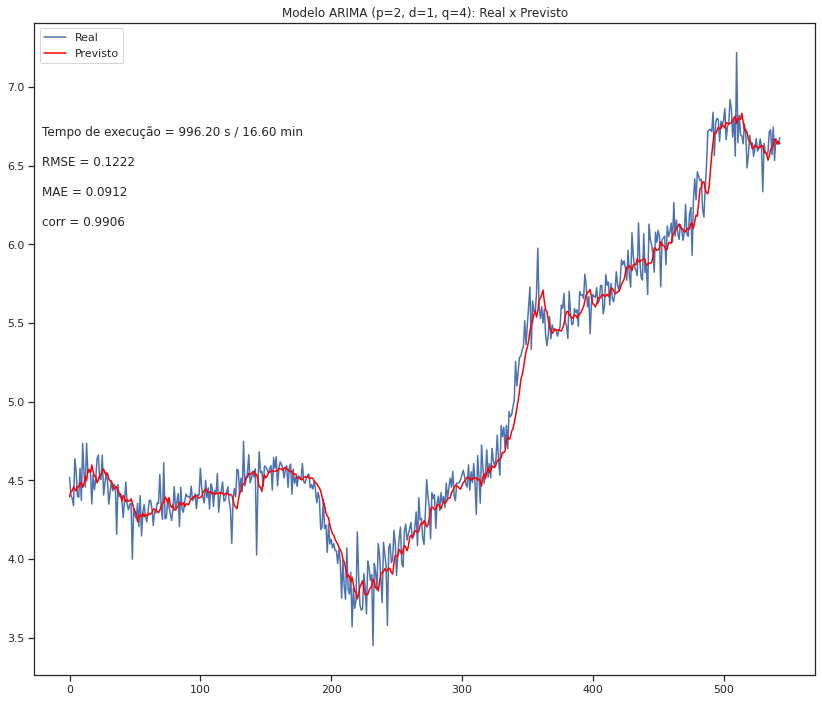

In [ ]:
# Plotando os resultados obtidos 
# (novo modelo: previsto x esperado):
plt.figure(figsize=(14, 12))
plt.plot(test_arima, label='Real')
plt.plot(predictions, color='red', label='Previsto')
plt.title(f"Modelo ARIMA (p={p}, d={d}, q={q}): Real x Previsto")
plt.legend()
texto = (f"Tempo de execução = {(final_time - start_time):.2f} s / {(final_time - start_time)/60:.2f} min")
left, right = plt.xlim() # Retorna os valores correntes de x no gráfico
bottom, top = plt.ylim() # Retorna os valores correntes de y no gráfico

y=top-0.72
x=left+6.15
plt.text(x, y, texto)
y-=.19
for k, v in resultados_arima.items():
  texto = (f"{k} = {round(v,4)}")
  plt.text(x, y, texto)
  y-=.19

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+'ARIMA_'+str(p)+str(d)+str(q), format='jpg')

plt.show()

### A existência (ou não) de correlação entre os resíduos ou erros residuais do modelo pode ser avaliada pelos gráficos ACF e PACF abaixo. Pelos gráficos não foi possível identificar uma tendência ou padrão nos erros residuais do modelo
<hr>

In [ ]:
# Parâmetros do modelo (inicialização):
p = 4
d = 1
q = 1

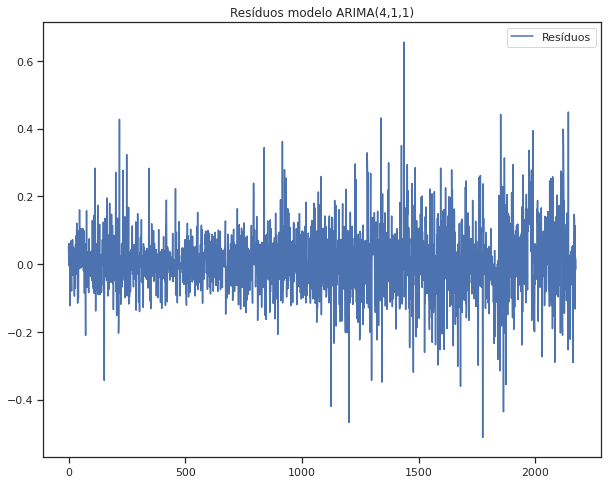

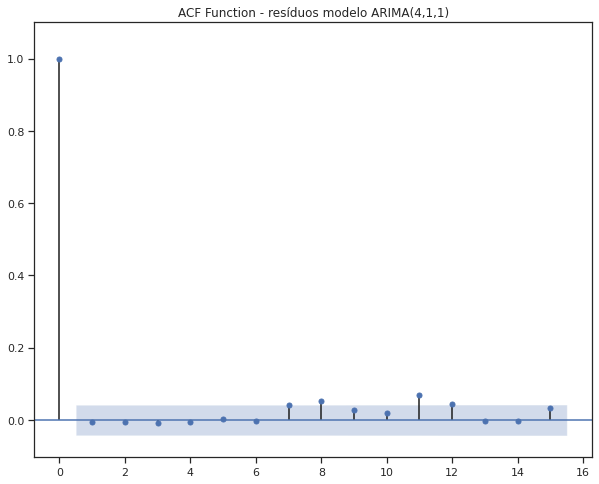

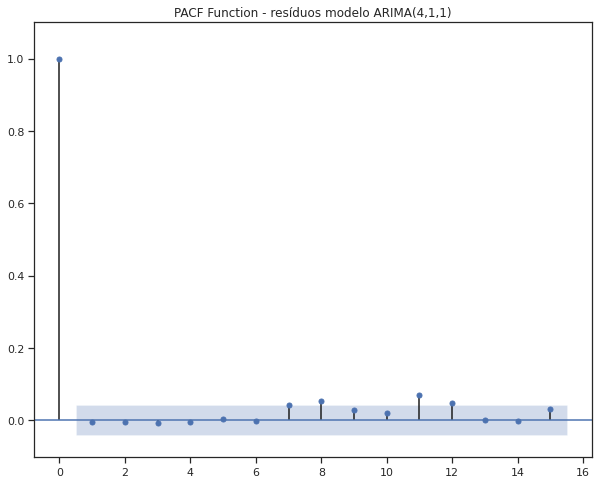

In [ ]:
# Plotando os resíduos do modelo ARIMA
residuals = model_fit_411.resid[1:]
plt.figure(figsize=(10, 8))
plt.plot(residuals, label='Resíduos')
plt.title(f"Resíduos modelo ARIMA({p},{d},{q})")
plt.legend()
plt.show()

# Plot ACF
fig, ax = plt.subplots(figsize=(10, 8))
plot_acf(residuals, lags=maxlag,
         title=f"ACF Function - resíduos modelo ARIMA({p},{d},{q})",
         auto_ylims=True, missing='drop', ax=ax)
bottom, top = plt.ylim()  
plt.ylim(bottom-0.05, top-0.15) 
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(10, 8))
plot_pacf(residuals, lags=maxlag,
          title=f"PACF Function - resíduos modelo ARIMA({p},{d},{q})",
          auto_ylims=True, ax=ax)
bottom, top = plt.ylim()  
plt.ylim(bottom-0.05, top-0.15) 
plt.show()

### Os gráficos plotados para os resíduos não mostram, a princípio, correlação. Um critério formal de verificação é o teste estatístico de *Ljung-Box*:
###- **Hipótese nula (H0)**: os dados são independentemente distribuídos;
###- **Hipótese alternativa (H1)**: os dados não são independentemente distribuídos (há correlação).

In [ ]:
# Teste estatístico de Ljung-Box:
df_ljb = acorr_ljungbox(residuals,lags=None)
print (f" Teste Ljung-Box dos Resíduos")
print (f"     (lag máximo = {min(10, len(residuals)//5)})")
print ('      lag:   p-value:')
for i in range(df_ljb.shape[0]):
  print(f"      {i+1:>2}     {df_ljb.loc[i+1,'lb_pvalue']:.4f}")

 Teste Ljung-Box dos Resíduos
     (lag máximo = 10)
      lag:   p-value:
       1     0.8296
       2     0.9553
       3     0.9706
       4     0.9884
       5     0.9968
       6     0.9991
       7     0.7402
       8     0.2403
       9     0.2068
      10     0.2330


### O teste de *Ljung-Box* confirma que não há correlação nos residuos do modelo
<hr>

## **5.2. Autorregressão vetorial (VAR)**
<hr WIDTH=30% ALIGN=LEFT NOSHADE>


### No mundo real, várias séries temporais atuam em paralelo, supostamente relacionadas entre si. A análise de regressão tendo essa premissa, pode ser feita gerando um modelo AR para o caso de múltiplas variáveis. Assim, representa-se o fato de que as variáveis influenciam umas as outras. Em um modelo fechado, as variáveis internas do próprio modelo são denominadas endógenas. As variáveis exógenas, fora do modelo, não são consideradas no VAR.

### Um dos modelos AR multivariado é a autorregressão vetorial, ou VAR (sigla vinda do inglês Vector Autoregression). Como qualquer modelo AR, o VAR se refere aos períodos anteriores, ou *lags*, representados pelo parâmetro *p* (modelo VAR(*p*)). 

### Antes de aplicar o VAR, verifica-se se as demais séries do conjunto são estacionárias ou não. Já vimos ainda nesse notebook que a série de preço do combustível não é estacionária. Agora, aplica-se o *adfuller* para todas as séries
<hr>

In [ ]:
# Pequena função para percorrer todas a séries
# realizando o teste adfuller:
def adfuller_test(df_new):
  for col in df_new.columns:
    print(f"{col} p-value = {adfuller(df_new[col])[1]}")
print(f"Valores-p para cada série temporal do modelo:")
adfuller_test(df_new)

Valores-p para cada série temporal do modelo:
Fuel_Price p-value = 0.9947332288109054
USD/BRL p-value = 0.9177578891905334
PETR4 p-value = 0.28107488581452866
Brent p-value = 0.6000513648915007
IPCA p-value = 6.905698977277415e-05
MWh p-value = 0.02806242912212361


### Como se pode ver, apenas IPCA e MWh são séries estacionárias. Deve-se diferenciar as demais séries e aplicar novamente o teste ADF
<hr>

In [ ]:
# Diferenciando as séries aplicando o adfuller novamente:
df_diff = df_new.copy()
for col in df_diff.drop(columns=['IPCA', 'MWh']).columns:
    df_diff[col] = df_diff[col].diff()
#df_diff = df_diff.diff()
df_diff = df_diff.dropna()
print (f"Valores-p de cada série temporal do modelo")
print (f"(séries ajustadas por diferenciação quando necessário):")
adfuller_test(df_diff)

Valores-p de cada série temporal do modelo
(séries ajustadas por diferenciação quando necessário):
Fuel_Price p-value = 1.451810415878325e-14
USD/BRL p-value = 9.559327233005689e-22
PETR4 p-value = 2.8680252638625498e-30
Brent p-value = 0.0
IPCA p-value = 6.91753888977289e-05
MWh p-value = 0.027918010586422074


### Como vista acima, as séries não estacionária se tornaram estacionárias após uma diferenciação. Parte-se então para a escolha do parâmetro *p* a ser utilizado no VAR(*p*)
<hr>

### O pacote para a modelagem do VAR é obtida de *statsmodels.tsa.vector_ar.var_model*
<hr>

### Para a escolha do parâmetro *p* do modelo, novamente opta-se para aquele modelo com **menor** valor de **AIC** (Critério de Informação de Akaike).
<hr>

In [ ]:
# Separando os dados em treino e teste para modelar o VAR
# Mantém-se o percentual do ARIMA de 75/25 por cento:
maxlag=15
train_size = int(0.75*df_diff.shape[0])
train_var = df_diff[:train_size].values
test_var = df_new[train_size:].values

# Definindo um modelo VAR sem escolha do parâmetro p:
var_model = VAR(train_var)

# Para a escolha do parâmetro p vamos utilizar select_order
# de statsmodels.tsa.vector_ar.var_model.VAR
# var_model.select_order().summary()
var_model.select_order(maxlags=maxlag).summary()

,AIC,BIC,FPE,HQIC
0,14.77,14.79,2.596e+06,14.78
1,7.487,7.627*,1785.,7.539
2,7.382,7.642,1606.,7.478
3,7.270,7.650,1436.,7.411*
4,7.262*,7.762,1425.*,7.447
5,7.271,7.891,1438.,7.501
6,7.279,8.020,1450.,7.554
7,7.295,8.155,1473.,7.615
8,7.322,8.302,1514.,7.686
9,7.342,8.442,1544.,7.750


### Como visto acima, o *lag* com menor **AIC** é o ***lag* = 4**

### Na célula de código a seguir podemos ver outras métricas para a mesma construção que acabamos de executar.
<hr>

In [ ]:
# Treinando o "MODELO ÓTIMO"
var_model_final = var_model.fit(maxlags=maxlag, ic='aic')
# Definindo o "LAG ÓTIMO"
selected_lag = var_model_final.k_ar
print (f"O valor do parâmetro p que minimiza AIC em VAR(p)")
print (f"para um número máximo de lags = {maxlag} é p = {selected_lag}.")

O valor do parâmetro p que minimiza AIC em VAR(p)
para um número máximo de lags = 15 é p = 4.


In [ ]:
# Resumo estatístico do "MODELO ÓTIMO"
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 29, Oct, 2022
Time:                     01:33:29
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    7.73034
Nobs:                     1627.00    HQIC:                   7.41752
Log likelihood:          -19585.7    FPE:                    1384.38
AIC:                      7.23300    Det(Omega_mle):         1263.34
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.049382         0.057868           -0.853           0.393
L1.y1        -0.889457         0.024719          -35.983           0.000
L1.y2        -0.027016         0.071360           -0.379           0.705
L1.y3        -0.001740

### Verificando se há correlação entre os resíduos, caso haja, significa que existe um padrão nestes resíduos que ainda precisa ser explicada pelo modelo.
### Optou-se pela ***estatística de Durbin-Watson***, mostrada a seguir 
<hr>

In [ ]:
# Teste estatístico Durbin-Watson:
resid_dw = durbin_watson(var_model_final.resid)
for col, val in zip(df_diff.columns, resid_dw):
    print(f"Estatística de Durbin-Watson para a série {col} = {round(val, 4)}")

Estatística de Durbin-Watson para a série Fuel_Price = 2.0239
Estatística de Durbin-Watson para a série USD/BRL = 1.9864
Estatística de Durbin-Watson para a série PETR4 = 1.9884
Estatística de Durbin-Watson para a série Brent = 1.9983
Estatística de Durbin-Watson para a série IPCA = 2.0034
Estatística de Durbin-Watson para a série MWh = 1.9997


### A *estatística de Durbin-Watson* é utilizada para detectar se há autocorrelação na primeira defasagem dos resíduos do modelo de regressão. O valor da estatística de Durbin-Watson varia entre 0 e 4, sendo que a ausência de correlação é representada por 2. Isto é, para **valores próximos a 2 aceita-se a hipótese nula (H0)** de que **não há correlação entre os resíduos**. Um valor próximo a 0 indica uma correlação positiva entre os resíduos, sendo a estatística próxima a 4 um indicativo de correlação negativa

### Como visto, os valores estão bastante próximos a 2, de modo que os resíduos podem ser considerados homocedásticos
<hr> 

### Definido o modelo VAR, vamos avaliar seu desempenho, realizando a previsão para um período a frente, de modo similar ao realizado no modelo ARIMA (comparando uma a uma as previsões com os dados de teste)
### Em seguida validamos o modelo por meio da função *validation* e plotamos  *valores previstos x valores reais*
<hr>

In [ ]:
# Lista para gravar os resultados
predictions = []

# Primeiros dados para treinamento do modelo
history = train_var.tolist()

# Treinamento
start_time = time.time() # Tempo inicial para avaliar o custo computacional
for t in range(len(test_var)):
    var_model_final = VAR(history)
    # Moldelagem com o lag pré-determinado:
    var_model_final = var_model_final.fit(selected_lag) 
            # Predição: para um passo a frente nos dados diferenciados:
    pred = (var_model_final.forecast(y=np.array(history[-selected_lag:]), steps=1)[0][0]
            # Predição: soma-se o valor da diferenciação ao valor origninal anterior:
            + df_new.iloc[-test_var.shape[0]-1+t, 0])
    # Atualiza as previsões:
    predictions.append(pred)
    # Atualiza os dados originais: 
    history.append(df_diff.iloc[-test_var.shape[0]+t, :].values.tolist())
final_time = time.time() #Tempo final para avaliar a demanda computacional

In [ ]:
# Validando o modelo:
var_model_results = validation(np.array(test_var)[:, 0], predictions)

Validação do modelo por métricas estatísticas:
Raiz do Erro Quadrático Médio (RMSE) = 0.1232 
Erro Absoluto Médio (MAE) = 0.0906 
Correlação de Pearson (corr) = 0.9903 




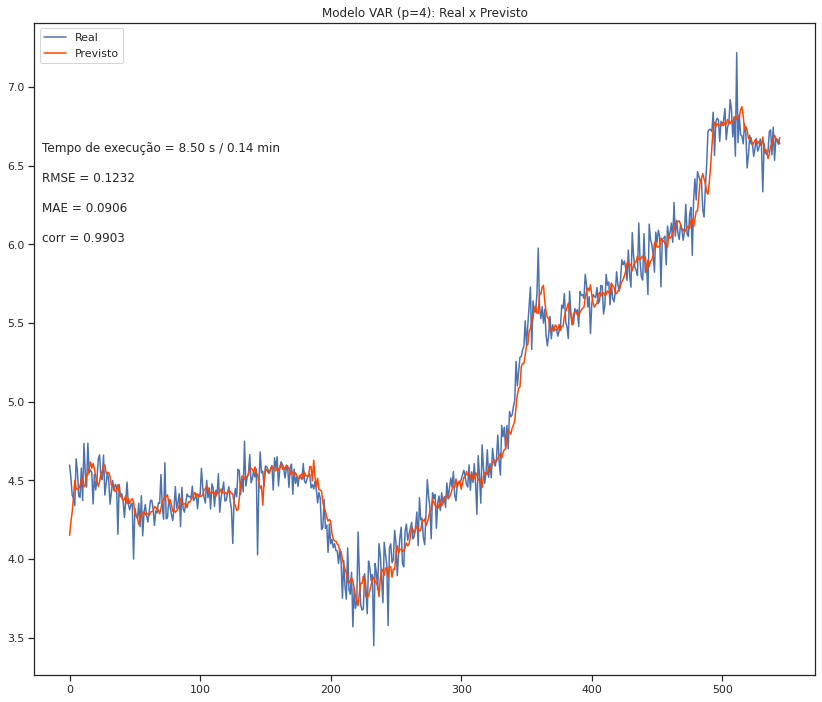

In [ ]:
# Plot previsto x esperado (VAR)
plt.figure(figsize=(14, 12))
plt.plot(np.array(test_var)[:, 0], label='Real')
plt.plot(predictions, color='orangered', label='Previsto')
plt.title(f"Modelo VAR (p={selected_lag}): Real x Previsto")
plt.legend()
texto = (f"Tempo de execução = {(final_time - start_time):.2f} s / {(final_time - start_time)/60:.2f} min")
left, right = plt.xlim() # Retorna os valores correntes de x no gráfico
bottom, top = plt.ylim() # Retorna os valores correntes de y no gráfico
y=top-0.82
x=left+6.15
plt.text(x, y, texto)
y-=.19
for k, v in var_model_results.items():
  texto = (f"{k} = {round(v,4)}")
  plt.text(x, y, texto)
  y-=.19

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+'VAR_'+str(p), format='jpg')

plt.show()

In [ ]:
# Atualizando dataframe de métricas:
df_all_metrics.loc[index_all_metrics] = [f'VAR_1',
                                         var_model_results['RMSE'],
                                         var_model_results['MAE'],
                                         var_model_results['corr'],
                                         round(final_time-start_time,2)] 
index_all_metrics += 1

# Atualizando o dataframe de predições:
df_ypred.loc[:,'y_VAR_1'] = predictions[-len_test_new:]

### **Causalidade de Granger**
### No VAR adotam-se as séries que, em tese, se influenciam mutuamente. Uma das formas de veriricar se uma das séries temporais do sistema efetivamente influencia as demais é usando o Teste de Causalidade de Granger. É possível testar essa relação antes mesmo de construir o modelo.

### Dadas duas séries temporais X2 e X1, a Causalidade de Granger testa a **hipótese** nula de que os valores passados de séries temporais (X2) ***não afetam*** a série X1. Em  caso de *rejeição da hipótese nula*, diz-se que a série X2 *Granger causa* a série X1

In [ ]:
# Definindo os parâmetros e dataset para receber os resultados:
test='ssr_chi2test' # Teste usando a distribuição chi-squared (qui-quadrado) 
n_var = len(df_diff.columns) # Número de colunas do dataframe de teste

# Criando o dataframe de teste (df_test) com valores nulos:
df_test = pd.DataFrame(np.zeros((1, n_var)), columns=df_new.columns, 
                       index=["Fuel_Price_x1"])
list_index_lag = [] # Lista para colocar o index do lag

# Aplicando o teste de hipótese em df_test:
for x2 in df_test.columns:
  # Aplicando a Causalidade de Granger em cada par de séries de df_test:
  test_result = grangercausalitytests(df_diff[["Fuel_Price", x2]],
                                      maxlag=selected_lag, verbose=False)
  # Buscando os valores-p (p-values) em cada lag do teste:
  p_values = [round(test_result[i+1][0][test][1],4)for i in range(selected_lag)]
  # Salvando o menor valor-p (p-value) encontrado para lags = maxlags:
  min_p_value = np.min(p_values)
  # Criando a lista com index do lag de menor p-value:
  list_index_lag.append('Lag of min p-value of ' +
                        x2 + ': '+str(p_values.index(min_p_value)+1))
  # Localizando o menor p-valor no dataframe df_test:
  df_test.loc["Fuel_Price_x1", x2] = min_p_value
  
# Trocando o nome das colunas e index
df_test.columns = [var + '_x2' for var in df_test.columns]

# Resultado: se as demais variáveis x2 Granger causam x1 (Fuel_Price):
print('Teste de Granger:\n',df_test,'\n')

Teste de Granger:
                Fuel_Price_x2  USD/BRL_x2  PETR4_x2  Brent_x2  IPCA_x2  MWh_x2
Fuel_Price_x1            1.0      0.0847    0.2548    0.7249   0.0595  0.1056 



In [ ]:
# Em relação ao teste de Granger, o lag com menor valor p:
print('Lag de menor p-value:')
list_index_lag

Lag de menor p-value:


['Lag of min p-value of Fuel_Price: 1',
 'Lag of min p-value of USD/BRL: 1',
 'Lag of min p-value of PETR4: 4',
 'Lag of min p-value of Brent: 2',
 'Lag of min p-value of IPCA: 2',
 'Lag of min p-value of MWh: 4']

### Através do teste de Causalidade de Granger, podemos ver que, dentro do período especificado,  não podemos rejeitar a hipótese nula para o valor das ações da ***Petrobras, PETR4, a cotação do barril de petróleo, Brent, e o consumo de energia, MWh***. Ou seja, essas três variáveis não Granger causam o preço do combustível. Assim, tais variáveis poderiam ser removidas da construção do modelo. Para nossa análise, treina-se agora o modelo sem as citadas séries para se averiguar o impacto desta remoção.

### Refazendo o **VAR** sem as colunas **PETR4**, **Brent** e **MWh**:
<hr>

In [ ]:
# Refazendo sem as colunas PETR4, Brent e MWh: 
df_alt_01 = df_diff.copy()
df_alt_01.drop(columns=['PETR4','Brent','MWh'],inplace=True)
df_alt_01.head()

,Fuel_Price,USD/BRL,IPCA
Date,,,
2011-01-04,0.052919,0.0140,0.43
2011-01-05,-0.030339,0.0127,0.43
2011-01-06,0.063101,0.0119,0.43
2011-01-10,-0.054820,0.0032,0.43
2011-01-11,0.044278,-0.0054,0.43


Validação do modelo por métricas estatísticas:
Raiz do Erro Quadrático Médio (RMSE) = 0.123 
Erro Absoluto Médio (MAE) = 0.0907 
Correlação de Pearson (corr) = 0.9904 





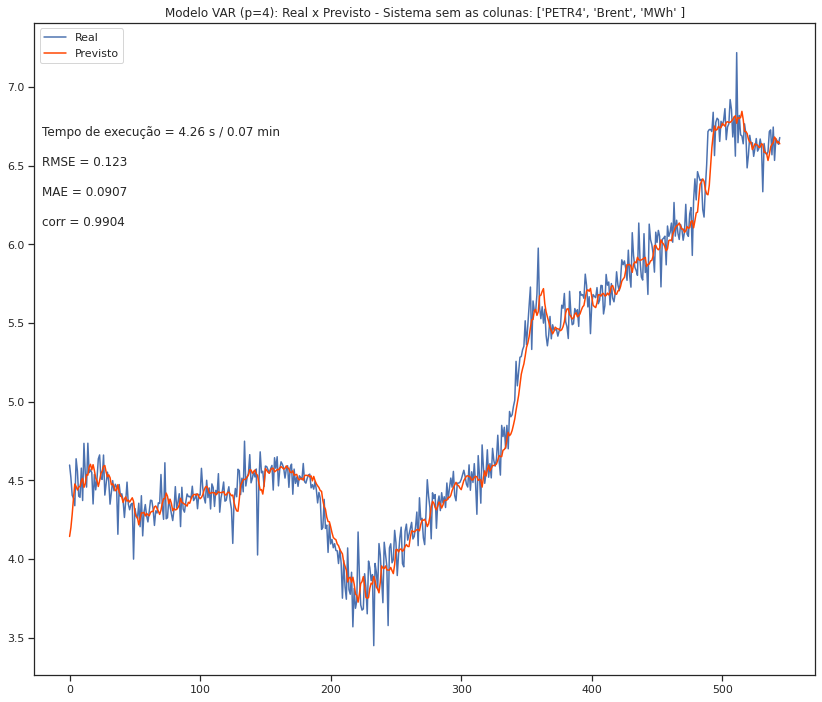

In [ ]:
# Refazendo sem as colunas PETR4, Brent e MWh
df_alt_01 = df_diff.copy()
df_alt_01.drop(columns=['PETR4', 'IPCA', 'USD/BRL', 'MWh'],inplace=True)

# Separando os dados em treino e teste para modelar o VAR
# Mantém-se o percentual do ARIMA de 75/25 por cento:
train_size = round(0.75*df_alt_01.shape[0])
train_var = df_alt_01[:train_size].values
test_var = df_new[train_size:].values

# lista para gravar os resultados
predictions = []

# primeiros dados para treinamento do modelo
history = train_var.tolist()

# Treinamento
start_time = time.time() # Tempo inicial para avaliar o custo computacional
for t in range(len(test_var)):
    var_model_final = VAR(history)
    var_model_final = var_model_final.fit(selected_lag)
    pred = (var_model_final.forecast(y=np.array(history[-selected_lag:]), steps=1)[0][0]
            + df_new.iloc[-test_var.shape[0]-1+t, 0])
    predictions.append(pred)
    history.append(df_alt_01.iloc[-test_var.shape[0]+t, :].values.tolist())
final_time = time.time() #Tempo final para avaliar a demanda computacional

# Validando o modelo:
var_model_results = validation(np.array(test_var)[:, 0], predictions)
print('')

# Plot previsto x esperado (VAR)
plt.figure(figsize=(14, 12))
plt.plot(np.array(test_var)[:, 0], label='Real')
plt.plot(predictions, color='orangered', label='Previsto')
plt.title(f"Modelo VAR (p={selected_lag}): Real x Previsto - Sistema sem as colunas: ['PETR4', 'Brent', 'MWh' ]")
plt.legend()
texto = (f"Tempo de execução = {(final_time - start_time):.2f} s / {(final_time - start_time)/60:.2f} min")
left, right = plt.xlim() # Retorna os valores correntes de x no gráfico
bottom, top = plt.ylim() # Retorna os valores correntes de y no gráfico
y=top-0.72
x=left+6.15
plt.text(x, y, texto)
y-=.19
for k, v in var_model_results.items():
  texto = (f"{k} = {round(v,4)}")
  plt.text(x, y, texto)
  y-=.19

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+'VAR_PETR4_Brent_MWh_'+str(p), format='jpg')

plt.show()

In [ ]:
# Atualizando dataframe de métricas:
df_all_metrics.loc[index_all_metrics] = [f'VAR_2',
                                         var_model_results['RMSE'],
                                         var_model_results['MAE'],
                                         var_model_results['corr'],
                                         round(final_time-start_time,2)] 
# Atualizando o dataframe de predições:
df_ypred.loc[:,'y_VAR_2'] = predictions[-len_test_new:]

In [ ]:
# Salvando os dataframes com as predições e métricas:
salva_dataframe(df_all_metrics, path_backup_df+'df_all_metrics')
salva_dataframe(df_ypred, path_backup_df+'df_ypred')

# **FIM**